<a href="https://colab.research.google.com/github/Aswin-Balaji-R/Bigmart-Analysis/blob/main/Big_Market_Analysis_(Aswin).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing Library files

In [2]:
#import necessary libraries and load dataset
import pandas as pd
trainset = pd.read_csv('/content/train.csv')
#import necessary libraries and load dataset
import pandas as pd
testset = pd.read_csv('/content/test.csv')
#import libraries
import numpy as np
#for handling missing values
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
#for data visualization
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#library file for standardization
from sklearn.preprocessing import StandardScaler
#for model building
from sklearn.linear_model import LinearRegression
#importing lib files for linear regression
from sklearn.metrics import r2_score as R2
from sklearn.model_selection import train_test_split, cross_val_score
#for evaluating the models using metrices
#lib files for MSE and MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

#Data sets

In [3]:
#display shapes of dataset
trainset.shape

(8523, 12)

In [4]:
#display shapes of dataset
testset.shape

(5681, 11)

In [5]:
#display the data type of each column
trainset.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
#display the data type of each column
testset.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [7]:
#display column names
trainset.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [10]:
#display column names
testset.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [9]:
#display information about the datasets
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
#display information about the datasets
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [12]:
#display number of missing values of each column
trainset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
#display the number of missing values of each column
testset.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [14]:
#display discriptive statistics
trainset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [15]:
#display discriptive statistics
testset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [16]:
#check for duplicated rows
trainset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [17]:
#check for duplicated rows
testset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Length: 5681, dtype: bool

In [18]:
#display values of the datasets
trainset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Here the target column is the Item outlet sales.

In Item fat content column the fat content of the item type is subjected within low fat and regular fat.

In conclusion , the trainset.head() explains about the first few rows of trainset where it explains about the item's unique ID , it's weight, it's visibility, the items whose fat content are to be dispalyed, the price of the items , outlet's identification number , the establishment year of outlet, outlet size where it explains about the physical size and capability of an outlet , it's geographic location, type of the outlets and outlet sales.

In [19]:
#display last few rows of datasets
trainset.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


Here the target column is the Item outlet sales.

In Item fat content column the fat content of the item type is subjected within low fat and regular fat.

In conclusion , the testset.head() explains about the last few rows of trainset where it explains about the item's unique ID , it's weight, it's visibility, the items whose fat content are to be dispalyed, the price of the items , outlet's identification number , the establishment year of outlet, outlet size where it explains about the physical size and capability of an outlet , it's geographic location, type of the outlets and outlet sales.

In [20]:
#display values of datasets
testset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [21]:
#display last few rows of datasets
testset.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [22]:
#display unique values and counts for 'Item_Fat_Content'
trainset['Item_Fat_Content'].values

array(['Low Fat', 'Regular', 'Low Fat', ..., 'Low Fat', 'Regular',
       'Low Fat'], dtype=object)

In [23]:
testset['Item_Fat_Content'].values

array(['Low Fat', 'reg', 'Low Fat', ..., 'Low Fat', 'Regular', 'Regular'],
      dtype=object)

In [24]:
#display updated value counts for 'Item_Fat_Content'
trainset['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [25]:
#import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors

In [26]:
# replace inconsistent values in 'Item_Fat_Content'
trainset['Item_Fat_Content'].replace(['LF','reg','low fat'],['Low Fat','Regular','Low Fat'],inplace=True)

In [27]:
testset['Item_Fat_Content'].replace(['LF','reg','low fat'],['Low Fat','Regular','Low Fat'],inplace=True)

#Graph Plotting


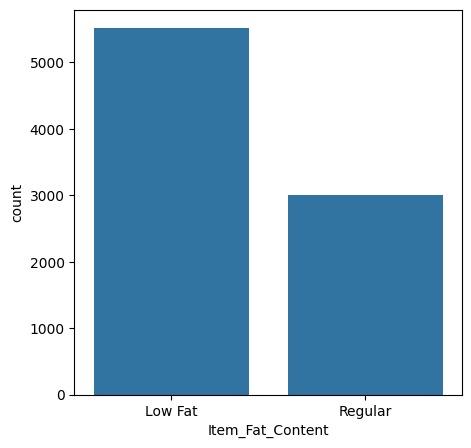

In [28]:
plt.figure(figsize=(5,5))
sns.countplot(x='Item_Fat_Content',data=trainset)
plt.xlabel('Item_Fat_Content')
plt.show()

In Item fat content the fat content of the item type is subjected within low fat and regular fat.

The item fat content explains about the Low and Regular fat content in the items.

The graph is plotted between item_fat_content and value counts in trainset using sns library and countplot.

Diary products ,Meat and Household products have low fat content where Soft drinks , fruits and vegetables have Regular fat content.

The low fat content is above 5000 value counts and regular fat content has 3000 value counts .

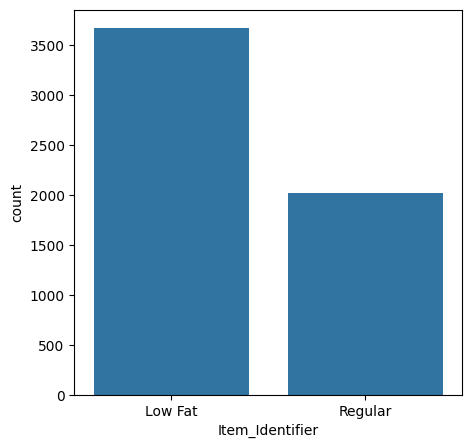

In [29]:
plt.figure(figsize=(5,5))
sns.countplot(x='Item_Fat_Content',data=testset)
plt.xlabel('Item_Identifier')
plt.show()

Item Identifier is an unique ID given to an item .

With the help of item identifier we can find the item fat content.

The fat content of the item type is subjected within low fat and regular fat.

The item fat content explains about the Low and Regular fat content in the items.

The graph is plotted between item_identifier and value counts in testset using sns library and countplot.

Diary products ,Meat and Household products have low fat content where Soft drinks , fruits and vegetables have Regular fat content.

The low fat content is above 3500 value counts and regular fat content has 2000 value counts.

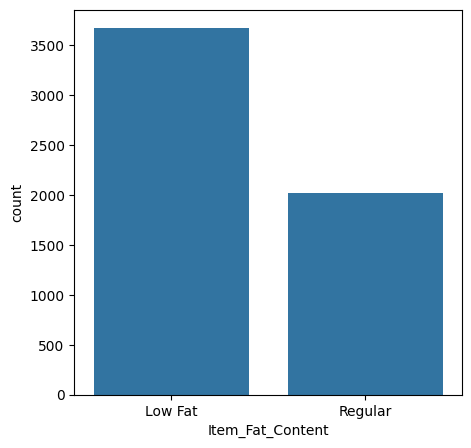

In [30]:
plt.figure(figsize=(5,5))
sns.countplot(x='Item_Fat_Content',data=testset)
plt.xlabel('Item_Fat_Content')
plt.show()

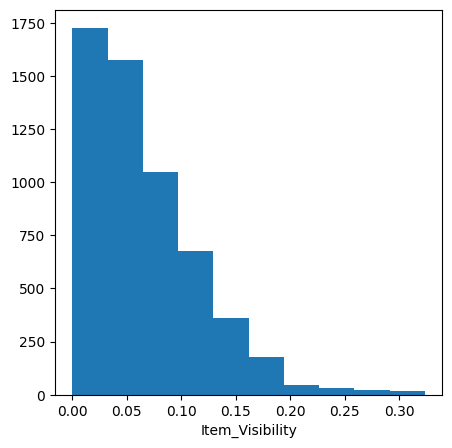

In [31]:
plt.figure(figsize=(5,5))
plt.hist(x='Item_Visibility',data=testset)
plt.xlabel('Item_Visibility')
plt.show()

#pie chart

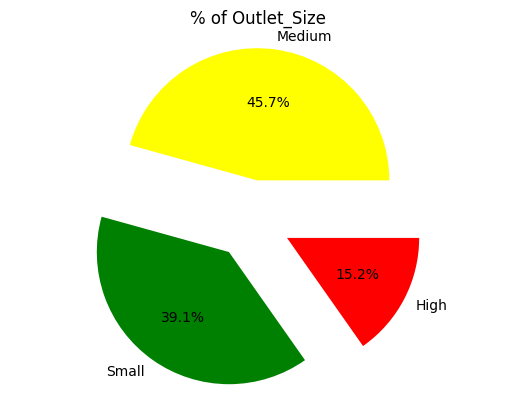

In [32]:
from matplotlib import colors
Outletsize = trainset['Outlet_Size'].value_counts(normalize=True) * 100
explode = (0.3,0.3,0.3)
colors = ('yellow','green','red')
plt.pie(Outletsize,labels = Outletsize.index,autopct='%1.1f%%',explode=explode,colors=colors)
plt.title('% of Outlet_Size')
plt.axis('equal')
plt.show()

#Handling Missing Values

In [33]:
le=LabelEncoder()
for col in trainset.columns:
  if trainset[col].dtype=='object':
    trainset[col]=le.fit_transform(trainset[col])

In [34]:
le=LabelEncoder()
for col in testset.columns:
  if testset[col].dtype=='object':
    testset[col]=le.fit_transform(testset[col])

In [35]:
imputer=SimpleImputer(strategy='median')
mis_cols=['Item_Weight','Outlet_Size']
trainset[mis_cols]=imputer.fit_transform(trainset[mis_cols])

In [36]:
imputer=SimpleImputer(strategy='median')
mis_cols=['Item_Weight','Outlet_Size']
testset[mis_cols]=imputer.fit_transform(testset[mis_cols])

#Data Visualization


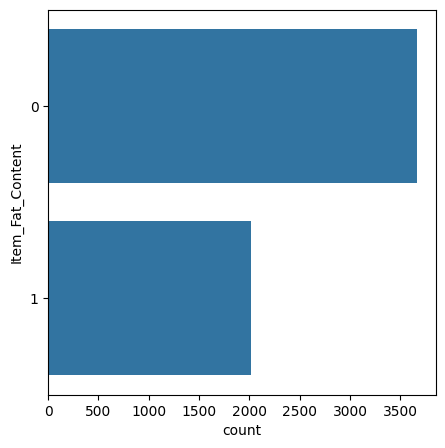

In [37]:
plt.figure(figsize=(5,5))
sns.countplot(y='Item_Fat_Content',data=testset)
plt.ylabel('Item_Fat_Content')
plt.show()

A countplot is a type of data visualization used in python.

It is particularly useful for visualising the count occurences of each unique value.

The sns.countplot function is used to create the count plot.

The items have more low fat content and moderate regular fat content.

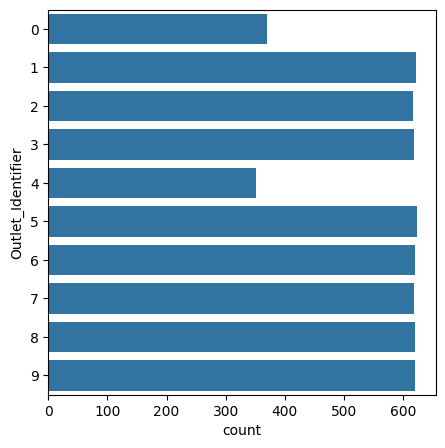

In [38]:
plt.figure(figsize=(5,5))
sns.countplot(y='Outlet_Identifier',data=testset)
plt.ylabel('Outlet_Identifier')
plt.show()

Outlet 'OUT049' has high exposures, indicating it appears most frequently in the dataset.

Outlet 'OUT017','OUT027','OUT046','OUT018','OUT045','OUT013','OUT035'also have high exposures, suggesting that these outlets are among the most common.

Several Outlets such as 'OUT010',OUT019' have much lower exposures.

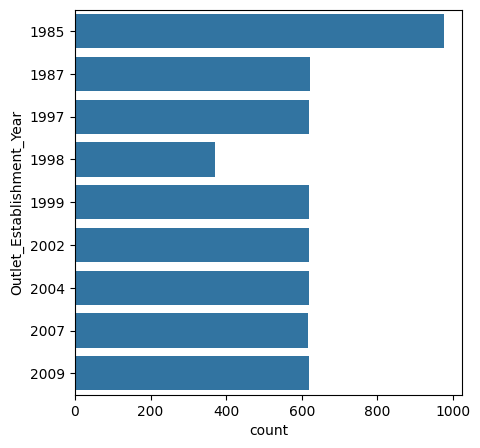

In [39]:
plt.figure(figsize=(5,5))
sns.countplot(y='Outlet_Establishment_Year',data=testset)
plt.ylabel('Outlet_Establishment_Year')
plt.show()

A significant number of outlets were established in the year 1985, indicating this was a peak year for opening new outlets.

There is a notable gap in establishment years from 1987-1997 , were no outlets were established during those 10 years.

In the year 1998 less outlets were established.

After 1998 , there is a gradual increse in the establishment of outlets and it was maintained till the year 2009.

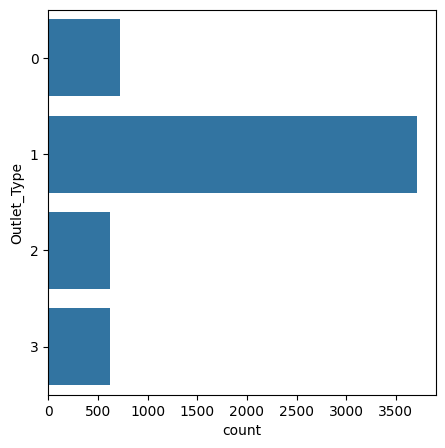

In [40]:
plt.figure(figsize=(5,5))
sns.countplot(y='Outlet_Type',data=testset)
plt.ylabel('Outlet_Type')
plt.show()

Super market type 1 is the most common outlet type , which indicates high exposure towards customers.

Grocery store is the second most common oulet type but so less than super market type 1.

super market type 2 and 3 have much low exposures which indictes that they are less common outlet types.

In [41]:
trainset['Outlet_Type'].value_counts()

Outlet_Type
1    5577
0    1083
3     935
2     928
Name: count, dtype: int64

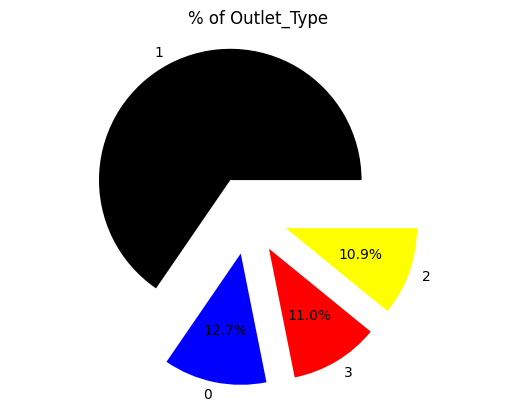

In [42]:
from matplotlib import colors
Outlet_Type = trainset['Outlet_Type'].value_counts(normalize=True) * 100
explode = (0.3,0.3,0.3,0.3)
colors = ('black','blue','red','yellow')
plt.pie(Outlet_Type,labels = Outlet_Type.index,autopct='%1.1f%%',explode=explode,colors=colors)
plt.title('% of Outlet_Type')
plt.axis('equal')
plt.show()

In [43]:
trainset['Outlet_Size'].value_counts()

Outlet_Size
1.0    2793
3.0    2410
2.0    2388
0.0     932
Name: count, dtype: int64

In [44]:
trainset['Item_Weight'].value_counts()

Item_Weight
12.600    1516
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: count, Length: 415, dtype: int64

#Handling Outlyers

<ipython-input-45-478c6e30a542>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=trainset['Item_Outlet_Sales'],kde=True,rug=True)


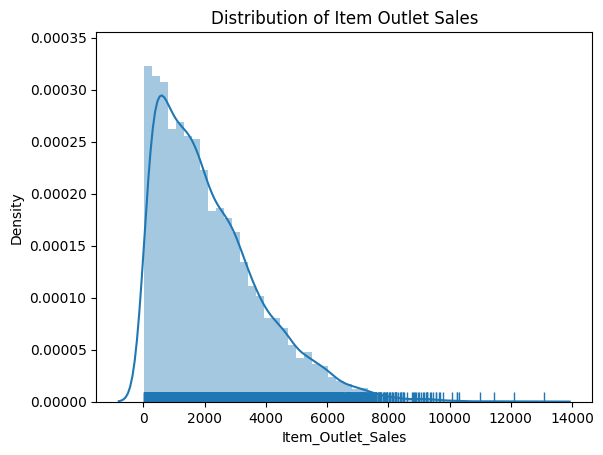

In [45]:
sns.distplot(a=trainset['Item_Outlet_Sales'],kde=True,rug=True)
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Item_Outlet_Sales')
plt.show()

<ipython-input-46-8042fc30e296>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=testset['Item_Weight'],kde=True,rug=True)


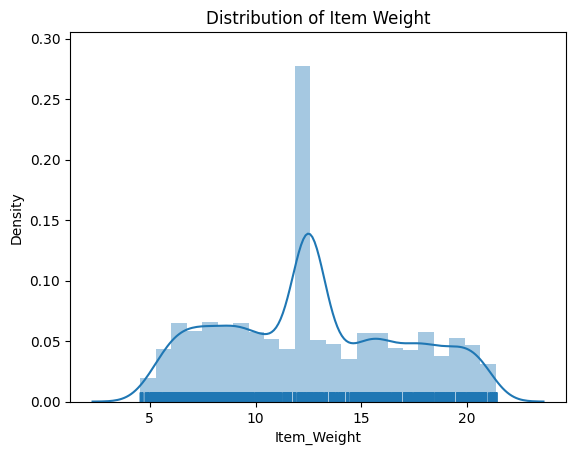

In [46]:
sns.distplot(a=testset['Item_Weight'],kde=True,rug=True)
plt.title('Distribution of Item Weight')
plt.xlabel('Item_Weight')
plt.show()

outliers are not present in item weight

<ipython-input-47-8042fc30e296>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=testset['Item_Weight'],kde=True,rug=True)


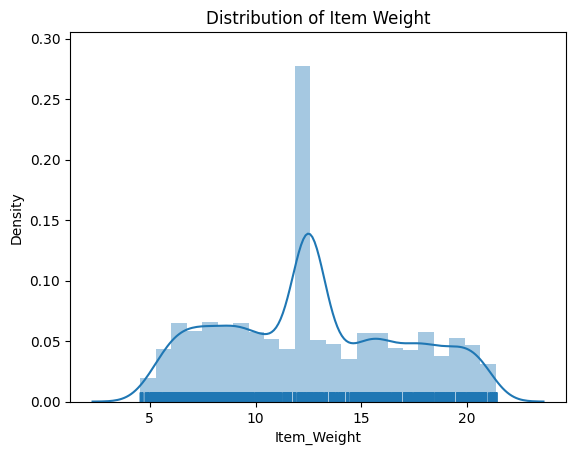

In [47]:
sns.distplot(a=testset['Item_Weight'],kde=True,rug=True)
plt.title('Distribution of Item Weight')
plt.xlabel('Item_Weight')
plt.show()

outliers are present within the range of 0.20 -0.35 in item visibility

<ipython-input-48-8042fc30e296>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=testset['Item_Weight'],kde=True,rug=True)


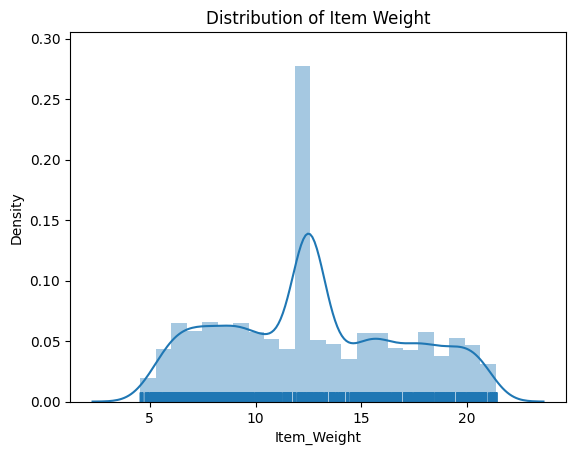

In [48]:
sns.distplot(a=testset['Item_Weight'],kde=True,rug=True)
plt.title('Distribution of Item Weight')
plt.xlabel('Item_Weight')
plt.show()

<ipython-input-49-ab31ba032808>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=testset['Outlet_Type'],kde=True,rug=True)


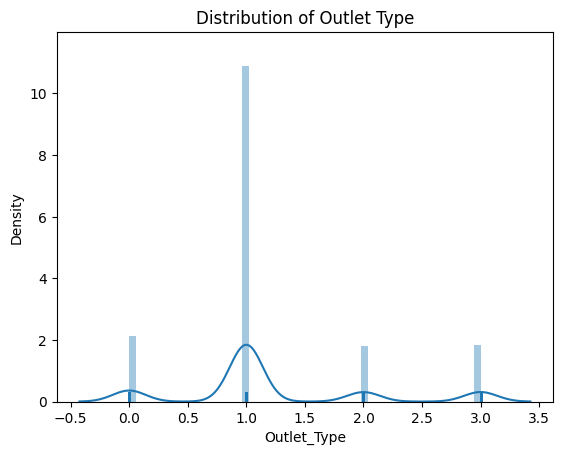

In [49]:
sns.distplot(a=testset['Outlet_Type'],kde=True,rug=True)
plt.title('Distribution of Outlet Type')
plt.xlabel('Outlet_Type')
plt.show()

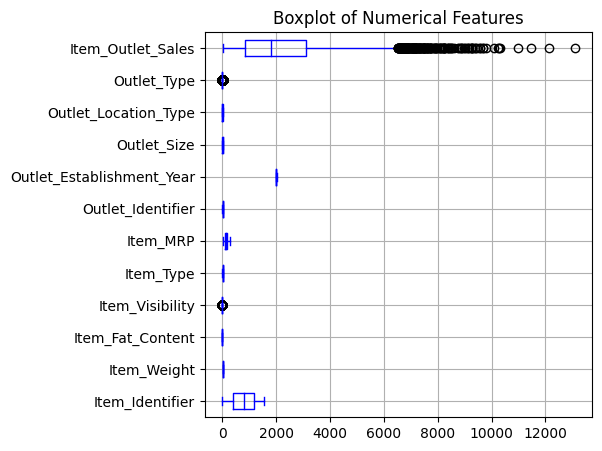

In [50]:
x=trainset.select_dtypes(include=['int64','float64'])
fig,ax=plt.subplots(figsize=(5,5))
x.boxplot(ax=ax,vert=False,color ='Blue')
plt.title('Boxplot of Numerical Features')
plt.show()

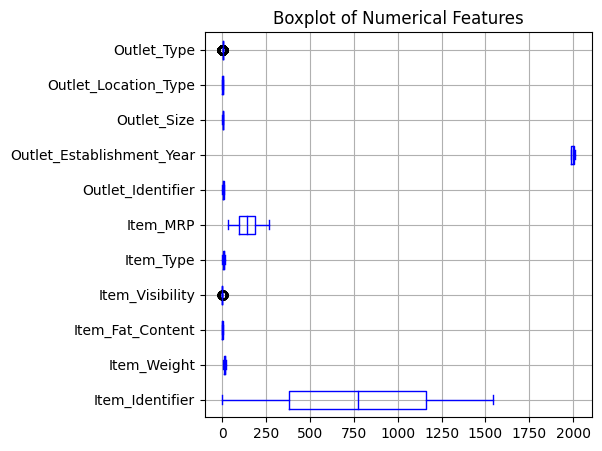

In [51]:
x=testset.select_dtypes(include=['int64','float64'])
fig,ax=plt.subplots(figsize=(5,5))
x.boxplot(ax=ax,vert=False,color ='Blue')
plt.title('Boxplot of Numerical Features')
plt.show()

In [52]:
Q1=np.percentile(trainset['Item_Outlet_Sales'],25)
Q3=np.percentile(trainset['Item_Outlet_Sales'],75)
iqr=Q3-Q1
print(iqr,Q1,Q3)


2267.049 834.2474 3101.2964


In [53]:
Q1=np.percentile(testset['Item_Weight'],25)
Q3=np.percentile(testset['Item_Weight'],75)
iqr=Q3-Q1
print(iqr,Q1,Q3)

6.654999999999999 9.195 15.85


In [54]:
Upper_limit=Q3+1.5*iqr
Lower_limit=Q1-1.5*iqr
print(Upper_limit,Lower_limit)

25.832499999999996 -0.7874999999999979


In [55]:
Q1=np.percentile(testset['Item_MRP'],25)
Q3=np.percentile(testset['Item_MRP'],75)
Upper_limit=Q3+1.5*iqr
Lower_limit=Q1-1.5*iqr
print(Upper_limit,Lower_limit,Q1,Q3)

196.0091 84.4295 94.412 186.0266


In [56]:
trainset['Sales_Square']=np.cbrt(trainset['Item_Outlet_Sales'])

<ipython-input-57-7d5ffe4a17e0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=trainset['Sales_Square'],kde=True,rug=True)


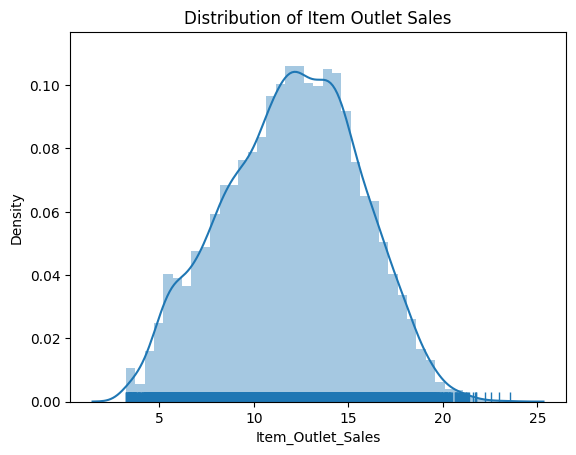

In [57]:
sns.distplot(a=trainset['Sales_Square'],kde=True,rug=True)
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Item_Outlet_Sales')
plt.show()

#plotting heatmap


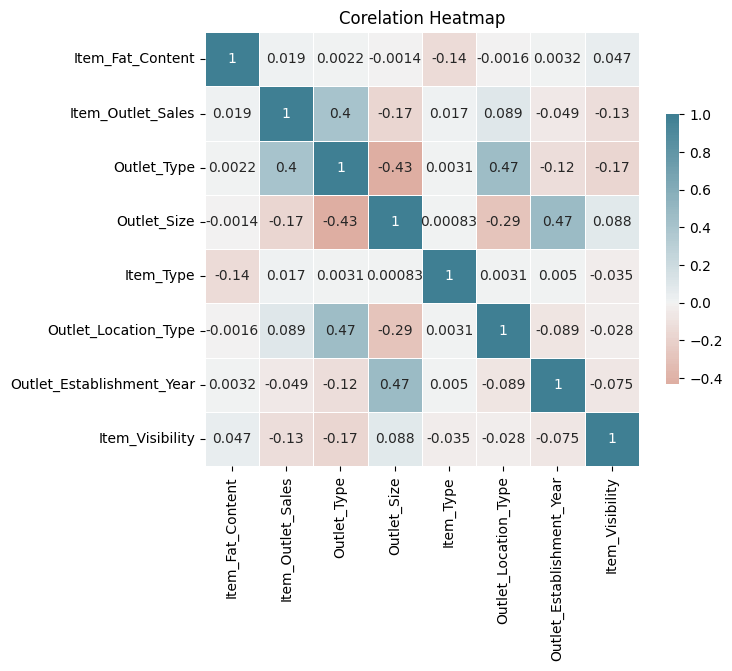

In [58]:
sublist=trainset[['Item_Fat_Content','Item_Outlet_Sales','Outlet_Type','Outlet_Size','Item_Type','Outlet_Location_Type','Outlet_Establishment_Year','Item_Visibility']]
corr=sublist.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
fig,ax=plt.subplots(figsize=(7,7))
sns.heatmap(corr,annot=True,cmap=sns.diverging_palette(20,220,n=200),center=0,square=True,linewidths=0.5,cbar_kws={'shrink':0.5})
plt.title('Corelation Heatmap')
plt.show()

#Encode Categorical variables


In [59]:
sublist_encoded = pd.get_dummies(sublist)

##Calculate Correlation Mtarix

In [60]:
corr = sublist_encoded.corr()

In [61]:
mask = np.triu(np.ones_like(corr, dtype=bool))

#Feature Engineering

In [62]:
trainset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Sales_Square
0,156,9.30,0,0.016047,4,249.8092,9,1999,1.0,0,1,3735.1380,15.515611
1,8,5.92,1,0.019278,14,48.2692,3,2009,1.0,2,2,443.4228,7.625576
2,662,17.50,0,0.016760,10,141.6180,9,1999,1.0,0,1,2097.2700,12.800240
3,1121,19.20,1,0.000000,6,182.0950,0,1998,3.0,2,0,732.3800,9.013888
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0.0,2,1,994.7052,9.982319


In [63]:
testset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,0,0.007565,13,107.8622,9,1999,1.0,0,1
1,1067,8.300,1,0.038428,4,87.3198,2,2007,3.0,1,1
2,1406,14.600,0,0.099575,11,241.7538,0,1998,3.0,2,0
3,809,7.315,0,0.015388,13,155.0340,2,2007,3.0,1,1
4,1184,12.500,1,0.118599,4,234.2300,5,1985,1.0,2,3


In [64]:
trainset['Outlet_Age']=trainset['Outlet_Establishment_Year'].apply(lambda year: 2024-year)
#creating a new variable in the dataset

In [65]:
testset['Outlet_Age']=testset['Outlet_Establishment_Year'].apply(lambda year: 2024-year)

In [66]:
trainset = trainset.drop(['Item_Type','Item_Visibility','Outlet_Establishment_Year','Outlet_Identifier','Item_Identifier','Item_Outlet_Sales'], axis=1)

In [67]:
testset = testset.drop(['Item_Type','Outlet_Establishment_Year','Outlet_Identifier','Item_Identifier'], axis=1)

In [69]:
testset=testset.drop(['Item_Visibility'],axis=1)
#drop function is to remove the content from list

In [70]:
trainset.head()

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Sales_Square,Outlet_Age
0,9.30,0,249.8092,1.0,0,1,15.515611,25
1,5.92,1,48.2692,1.0,2,2,7.625576,15
2,17.50,0,141.6180,1.0,0,1,12.800240,25
3,19.20,1,182.0950,3.0,2,0,9.013888,26
4,8.93,0,53.8614,0.0,2,1,9.982319,37


In [71]:
testset.head()

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,20.750,0,107.8622,1.0,0,1,25
1,8.300,1,87.3198,3.0,1,1,17
2,14.600,0,241.7538,3.0,2,0,26
3,7.315,0,155.0340,3.0,1,1,17
4,12.500,1,234.2300,1.0,2,3,39


#Standardization of feature scaling

In [72]:
x=trainset.iloc[:,:8]
y=trainset['Sales_Square']

In [73]:
a=testset.iloc[:,:8]

In [74]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(x)

In [75]:
scaler=StandardScaler()
a=scaler.fit_transform(a)
a=pd.DataFrame(a)

In [76]:
x.head()

,0,1,2,3,4,5,6,7
0,-0.831187,-0.738147,1.747454,-0.744458,-1.369334,-0.252658,0.983820,-0.139541
1,-1.630810,1.354743,-1.489023,-0.744458,1.091569,1.002972,-1.219039,-1.334103
2,1.108727,-0.738147,0.010040,-0.744458,-1.369334,-0.252658,0.225701,-0.139541
3,1.510904,1.354743,0.660050,1.277535,1.091569,-1.508289,-0.831430,-0.020085
4,-0.918719,-0.738147,-1.399220,-1.755454,1.091569,-0.252658,-0.561048,1.293934


In [77]:
type(x)

pandas.core.frame.DataFrame

In [78]:
a.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
dtype: object

In [79]:
a.head()

,0,1,2,3,4,5,6
0,1.905090,-0.740811,-0.536555,-0.744484,-1.369215,-0.252769,-0.139891
1,-1.027457,1.349873,-0.868937,1.277707,-0.138827,-0.252769,-1.095512
2,0.456482,-0.740811,1.629848,1.277707,1.091560,-1.507994,-0.020438
3,-1.259469,-0.740811,0.226697,1.277707,-0.138827,-0.252769,-1.095512
4,-0.038164,1.349873,1.508110,-0.744484,1.091560,2.257683,1.532446


In [80]:
type(a)

pandas.core.frame.DataFrame

#Model Building

In [81]:
import numpy as np

In [82]:
from sklearn.linear_model import LinearRegression
#importing lib files for linear regression
from sklearn.metrics import r2_score as R2
from sklearn.model_selection import train_test_split, cross_val_score
#for evaluating the models using metrices

In [83]:
lr=LinearRegression()
#define the linear regression model
lr.fit(trainset,y)
#train the model on training data
y_predict=lr.predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [84]:
print("R-Square value on the training set:=",lr.score(trainset,y))
print("----------------------------------------------------------")

R-Square value on the training set:= 1.0
----------------------------------------------------------


In [85]:
scores=cross_val_score(lr,trainset,y,cv=5)
print('CV R-Squared scores:',scores,"\n")
print('Average CV R-Squared score:',np.mean(scores),"\n")
#use cross validation to get the R squared values

CV R-Squared scores: [1. 1. 1. 1. 1.] 

Average CV R-Squared score: 1.0 



In [86]:
print('MSE on the traning set: = ',MSE(y,y_predict))
print('MAE on the traning set: = ',MAE(y,y_predict))

MSE on the traning set: =  150.4695242319634
MAE on the traning set: =  11.99183982370809


#saving model

In [87]:
import pickle

In [88]:
tfp="Big Mart Analysis.sav"
pickle.dump(lr,open(tfp,'wb'))